## Random Forest Classification

<font color='grey'>Author : Surejya Suresh </font> | [GitHub](https://github.com/surejyaa) | [LinkedIn](https://www.linkedin.com/in/surejyaa)

### Import required packages

In [1]:
import pandas as pd #data manipulation and analysis
import numpy as np #linear algebra
import matplotlib.pyplot as plt #visualization

from sklearn.model_selection import train_test_split #split the dataset in training set and test set
from sklearn.preprocessing import StandardScaler #feature scaling
from sklearn.ensemble import RandomForestClassifier #Random Forest classifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score #evaluation metrics

### Import dataset

In [2]:
data = pd.read_csv("datasets/social_network_ads.csv")
data.head()  #head of the dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
data.tail()  #tail of the dataset

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [4]:
data.shape  #dimension of the dat: (rows,columns)

(400, 3)

In [5]:
# input feature
X = data.iloc[:, :-1].values

#target feature
y = data.iloc[:, -1].values

In [6]:
X[0]

array([   19, 19000], dtype=int64)

In [7]:
y[0]

0

### Splitting the dataset to training set and test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train size:", len(X_train))
print("y_train size:", len(y_train))
print("X_test size:", len(X_test))
print("y_test size:", len(y_test))

X_train size: 320
y_train size: 320
X_test size: 80
y_test size: 80


In [9]:
X_train[0]

array([    58, 144000], dtype=int64)

In [10]:
y_train[0]

1

### Feature Scaling

In [11]:
std_scalar = StandardScaler()
X_train = std_scalar.fit_transform(X_train)
X_test = std_scalar.transform(X_test)

In [12]:
X_train[0]

array([1.92295008, 2.14601566])

In [13]:
X_test[0]

array([-0.79895082,  0.49460758])

### Training the Random Forest Model

In [14]:
model_rf = RandomForestClassifier(n_estimators=10, 
                                  criterion='entropy', 
                                  random_state=0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Prediction on test data - X_test

In [15]:
y_pred = model_rf.predict(X_test)

#Compare the predicted value with the actual target value
df_check = pd.DataFrame({'ActualValues': y_test, 'PredictedValues': y_pred})
df_check

,ActualValues,PredictedValues
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75,0,0
76,0,0
77,0,0
78,1,1


### Evaluating the results

In [16]:
# Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", round(precision_score(y_test, y_pred), 2))
print("Recall Score:", round(recall_score(y_test, y_pred),2))
print("f1 Score:", round(f1_score(y_test, y_pred),2))

Confusion Matrix:
 [[54  4]
 [ 3 19]]

Accuracy Score: 0.9125
Precision Score: 0.83
Recall Score: 0.86
f1 Score: 0.84


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


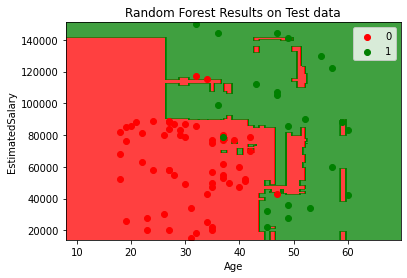

In [17]:
#Visualizing the model prediction on the test data

from matplotlib.colors import ListedColormap
X_set, y_set = std_scalar.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, model_rf.predict(std_scalar.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Results on Test data')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()